In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("data.csv", encoding='latin-1')

In [5]:
print(df.describe)

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custo

In [6]:
print("Dataset Shape:", df.shape)

Dataset Shape: (541909, 8)


In [7]:
print("\nColumns:", df.columns.tolist())


Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
print("\nData Types:\n", df.dtypes)


Data Types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [12]:
print("\nSummary Statistics:\n", df.describe(include='all'))  # Descriptive statistics


Summary Statistics:
        InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

     

In [11]:
print("\nSummary Statistics:\n", df.describe(include='all')) #Handle missing values


Summary Statistics:
        InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

     

In [14]:
df['Country'] = df['Country'].fillna('Unknown')

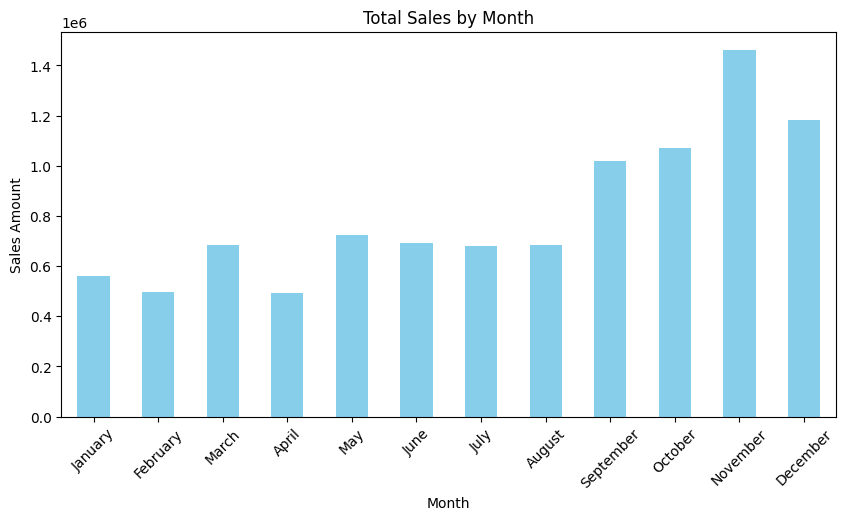

In [17]:
plt.figure(figsize=(10,5))
df.groupby('Month')['Total'].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]).plot(kind='bar', color='skyblue')
plt.title("Total Sales by Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3821523717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Country', y='Total', estimator=sum, errorbar=None, palette='viridis') # Changed x to 'Country' and ci to errorbar


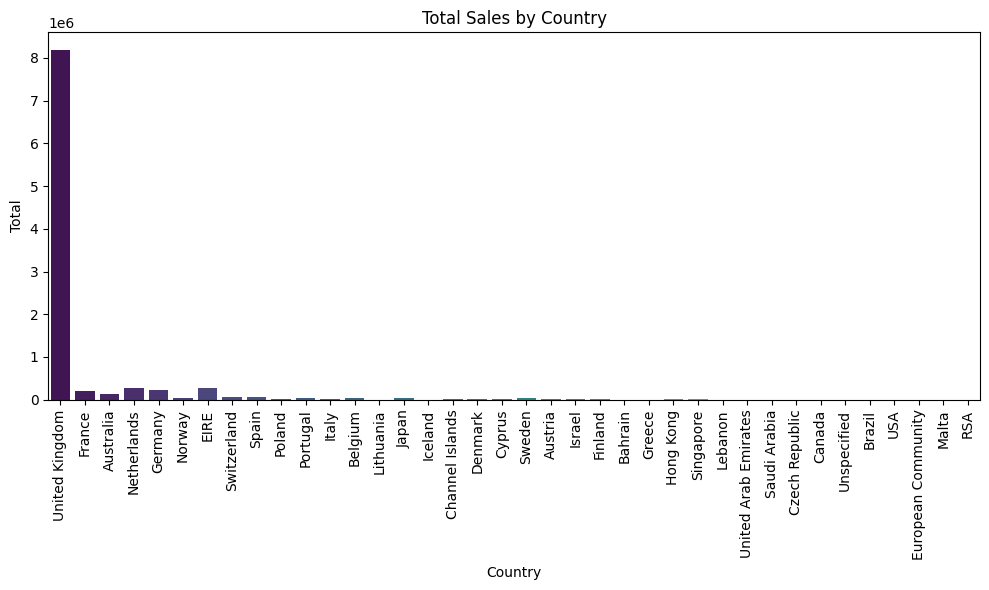

In [19]:
plt.figure(figsize=(10, 6)) # Increased figure size for better readability with many countries
sns.barplot(data=df, x='Country', y='Total', estimator=sum, errorbar=None, palette='viridis') # Changed x to 'Country' and ci to errorbar
plt.title("Total Sales by Country") # Updated title
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [21]:
value_counts = df['Country'].value_counts()
print("Value Counts:\n", value_counts) #value counts

Value Counts:
 Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA             

In [29]:
# Remove columns (list them)
df = df.drop(['InvoiceNo'], axis=1)

print(df.head())

KeyError: "['InvoiceNo'] not found in axis"

In [24]:
mean_values = df.groupby('Description')['UnitPrice'].mean()
print("\nMean:\n", mean_values)


Mean:
 Description
 4 PURPLE FLOCK DINNER CANDLES    2.455366
 50'S CHRISTMAS GIFT BAG LARGE    1.425231
 DOLLY GIRL BEAKER                1.499337
 I LOVE LONDON MINI BACKPACK      4.611364
 I LOVE LONDON MINI RUCKSACK      4.150000
                                    ...   
wrongly marked carton 22804       0.000000
wrongly marked. 23343 in box      0.000000
wrongly sold (22719) barcode      0.000000
wrongly sold as sets              0.000000
wrongly sold sets                 0.000000
Name: UnitPrice, Length: 4223, dtype: float64


In [25]:
sum_values = df.groupby('Description')['UnitPrice'].sum()
print("\nSum:\n", sum_values)


Sum:
 Description
 4 PURPLE FLOCK DINNER CANDLES    100.67
 50'S CHRISTMAS GIFT BAG LARGE    185.28
 DOLLY GIRL BEAKER                271.38
 I LOVE LONDON MINI BACKPACK      405.80
 I LOVE LONDON MINI RUCKSACK        4.15
                                   ...  
wrongly marked carton 22804         0.00
wrongly marked. 23343 in box        0.00
wrongly sold (22719) barcode        0.00
wrongly sold as sets                0.00
wrongly sold sets                   0.00
Name: UnitPrice, Length: 4223, dtype: float64


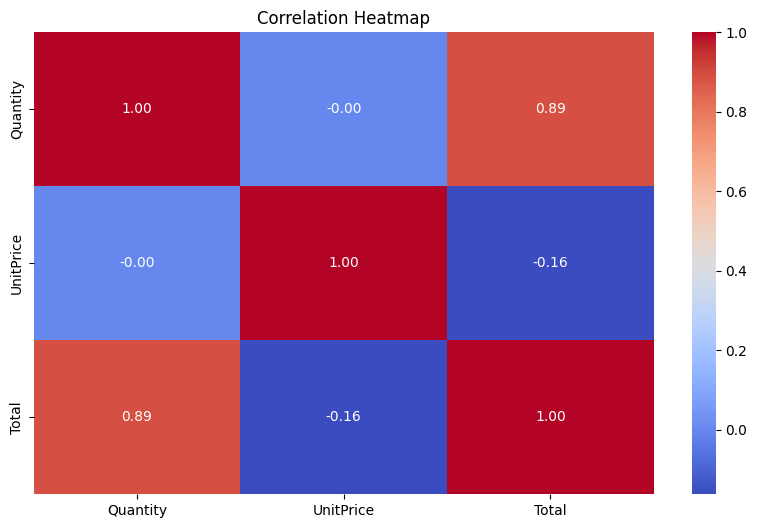

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [31]:
# Reload the data to ensure 'CustomerID' is present
df = pd.read_csv("data.csv", encoding='latin-1')

# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month name and create a 'Month' column
df['Month'] = df['InvoiceDate'].dt.strftime('%B')

# Calculate total sales for each row
df['Total'] = df['Quantity'] * df['UnitPrice']

# Fill missing 'Country' values as this was done previously
df['Country'] = df['Country'].fillna('Unknown')

/tmp/ipython-input-4095859753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_CustomerID.index, y=top_CustomerID.values, palette='cubehelix')


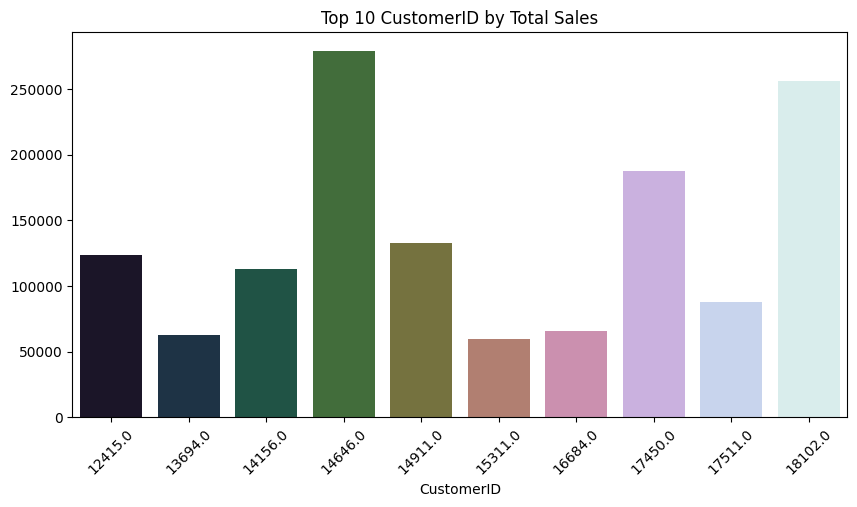

In [32]:
# Plot the top 10 CustomerID by total sales
top_CustomerID = df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_CustomerID.index, y=top_CustomerID.values, palette='cubehelix')
plt.title("Top 10 CustomerID by Total Sales")
plt.xticks(rotation=45)
plt.show()

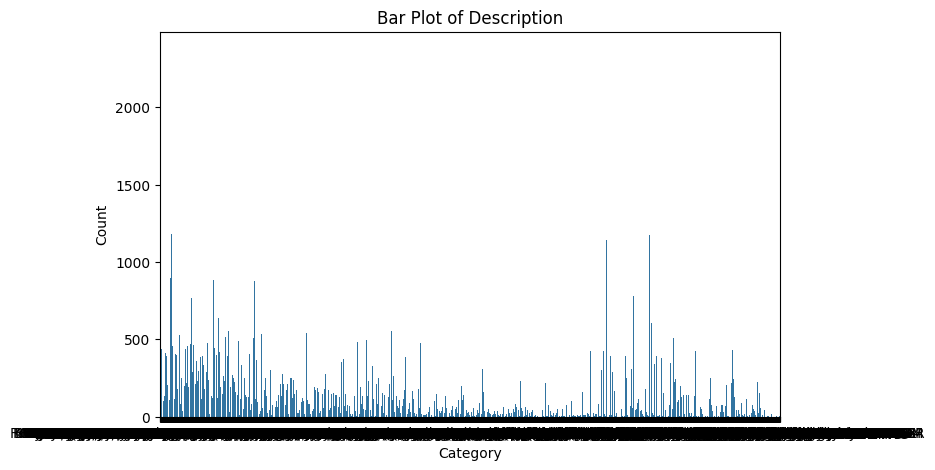

In [33]:
# Count plot (bar chart for categories)
plt.figure(figsize=(8,5))
sns.countplot(x='Description', data=df)
plt.title("Bar Plot of Description")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


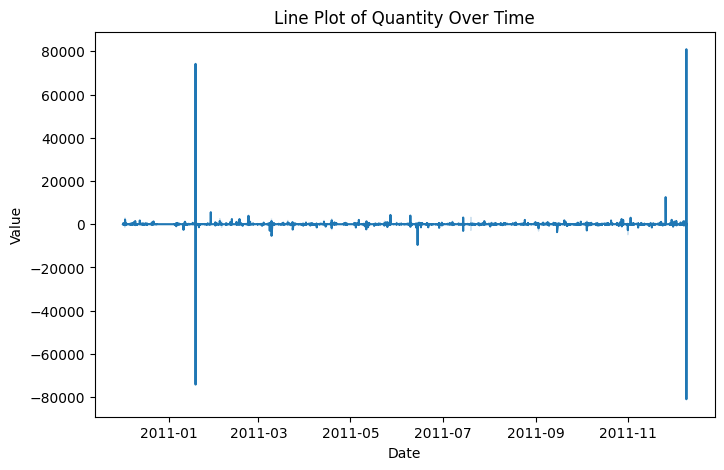

In [35]:
plt.figure(figsize=(8,5))
sns.lineplot(x='InvoiceDate', y='Quantity', data=df)
plt.title("Line Plot of Quantity Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


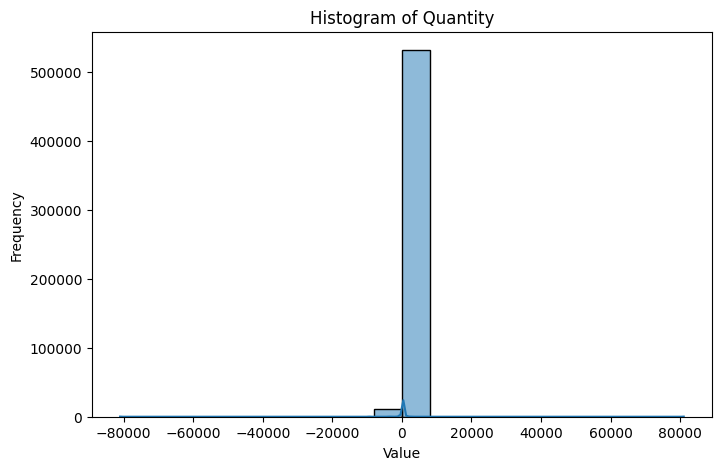

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title("Histogram of Quantity")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [40]:
import pandas as pd

# Load dataset
df = pd.read_csv("data.csv", encoding='latin-1')

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)  # numeric_only avoids errors with non-numeric columns
print(corr_matrix)

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.001235    -0.00360
UnitPrice  -0.001235   1.000000    -0.00456
CustomerID -0.003600  -0.004560     1.00000


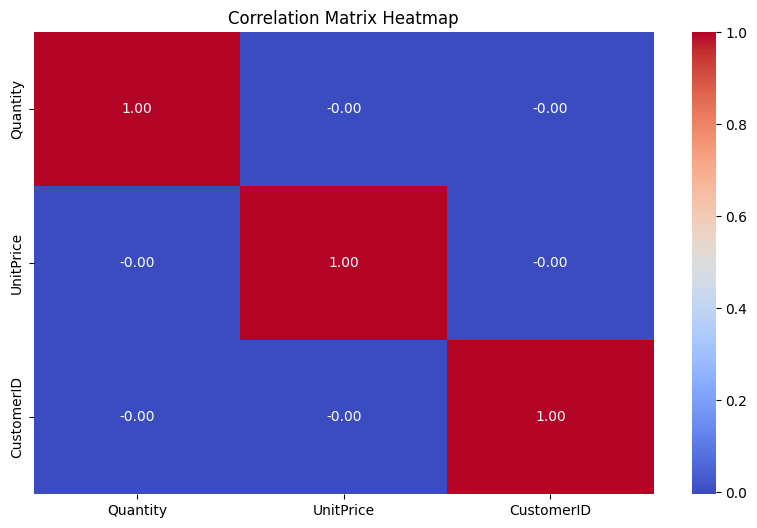

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()
